In [1]:
import scipy.io as scio
#可以使用scipy.io中的函数loadmat()读取mat文件

dataFile = '/media/tianming/文档/postgraduateStudy/TE/temultimodedata4mode.mat'
tedata = scio.loadmat(dataFile)
data = tedata['temultimodedata4mode']
workingCondition1 = data[0,0] #工况1数据
workingCondition2 = data[0,1] #工况2数据
workingCondition3 = data[0,2] #工况3数据
workingCondition4 = data[0,3] #工况4数据
tedata

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Feb 17 12:09:54 2019',
 '__version__': '1.0',
 '__globals__': [],
 'temultimodedata4mode': array([[array([[2.71032874e-01, 3.64973941e+03, 4.45132079e+03, ...,
         1.86135858e-01, 5.37630977e+01, 4.39857233e+01],
        [2.73102615e-01, 3.61624742e+03, 4.44093787e+03, ...,
         1.86135858e-01, 5.37630977e+01, 4.39857233e+01],
        [2.71203518e-01, 3.66236754e+03, 4.41940483e+03, ...,
         1.86135858e-01, 5.37630977e+01, 4.39857233e+01],
        ...,
        [2.64053000e-01, 3.66382019e+03, 4.44869304e+03, ...,
         1.68468196e-01, 5.35855040e+01, 4.41365589e+01],
        [2.60397891e-01, 3.67037604e+03, 4.41831590e+03, ...,
         1.68468196e-01, 5.35855040e+01, 4.41365589e+01],
        [2.57903792e-01, 3.67324680e+03, 4.44976855e+03, ...,
         1.88301086e-01, 5.38387694e+01, 4.46409631e+01]]),
         array([[2.71032874e-01, 3.64973941e+03, 4.45132079e+03, ...,
         1.86135858e-01,

In [2]:
import matplotlib.pyplot as plt
#加载matplotlib用于数据可视化
from sklearn.decomposition import PCA,KernelPCA
#加载PCA和KernelPCA算法包
from sklearn import preprocessing
%matplotlib notebook
#因为是在jupyter notebook中绘制，所以要加上这一句

varSel = [1,2,3,4,5,6,9,10,11,13,14,16,18,19,21,22] # 辅助变量选择
x_train1 = workingCondition1[:,varSel]
x_train2 = workingCondition2[:,varSel]
x_train3 = workingCondition3[:,varSel]
x_train4 = workingCondition4[:,varSel]

#Z-Score标准化
zscore = preprocessing.StandardScaler() #建立StandardScaler对象
x_train1 = zscore.fit_transform(x_train1)#标准化处理
x_train2 = zscore.fit_transform(x_train2)
x_train3 = zscore.fit_transform(x_train3)
x_train4 = zscore.fit_transform(x_train4)


# PCA 降维
pca = PCA(n_components=3)
reduced_x1=pca.fit_transform(x_train1)
reduced_x2=pca.fit_transform(x_train2)
reduced_x3=pca.fit_transform(x_train3)
reduced_x4=pca.fit_transform(x_train4)

#KPCA降维

fig0 = plt.figure()
ax0 = fig0.add_subplot(111,projection='3d')
ax0.scatter(reduced_x1[:,0],reduced_x1[:,1],reduced_x1[:,2],c='r',marker='x',s=1)
#ax0.scatter(reduced_x2[:,0],reduced_x2[:,1],reduced_x2[:,2],c='g',marker='o',s=1)
ax0.scatter(reduced_x3[:,0],reduced_x3[:,1],reduced_x3[:,2],c='b',marker='D',s=1)
ax0.scatter(reduced_x4[:,0],reduced_x4[:,1],reduced_x4[:,2],c='y',marker='x',s=1)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


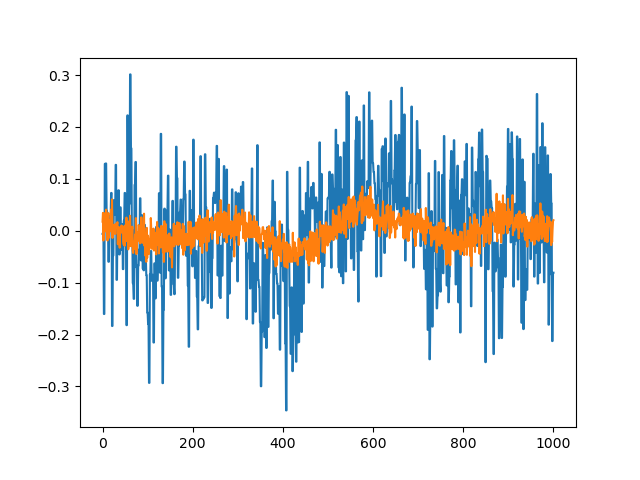

In [5]:
from sklearn import linear_model
#使用最小二乘线性回归进行拟合，导入相应的模块
#import matplotlib.pyplot as plt

ySel = 29
y_train1 = workingCondition1[:,ySel]
y_train2 = workingCondition2[:,ySel]
y_train3 = workingCondition3[:,ySel]
y_train4 = workingCondition4[:,ySel]

y_train1 = y_train1-y_train1.mean(axis=0)
y_train2 = y_train2-y_train2.mean(axis=0)
y_train3 = y_train3-y_train3.mean(axis=0)
y_train4 = y_train4-y_train4.mean(axis=0)

lr=linear_model.LinearRegression()
lr.fit(reduced_x1,y_train1)  #拟合
y=lr.predict(reduced_x1)    #得到预测值集合y

fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(y_train1)
ax1.plot(y)
#ax1.scatter(y,y_train1,c='r',marker='x',s=1)      #画出散点图,横轴是预测值，纵轴是真实值
plt.show()

